### Regression lineaire multiple pour les donnees advertising


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [125]:
X = df[['TV', 'Radio', 'Newspaper']].to_numpy()
Y = df['Sales'].to_numpy()

print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [126]:
Y = Y.reshape(Y.shape[0], 1)
print(Y.shape)

(200, 1)


In [127]:
# Création de la matrice X, en ajoutant une colonne des 1 pour inclure le biais du modèle 

X = np.hstack((X, np.ones((X.shape[0], 1))))

print(X.shape)
print(X[:10])

(200, 4)
[[230.1  37.8  69.2   1. ]
 [ 44.5  39.3  45.1   1. ]
 [ 17.2  45.9  69.3   1. ]
 [151.5  41.3  58.5   1. ]
 [180.8  10.8  58.4   1. ]
 [  8.7  48.9  75.    1. ]
 [ 57.5  32.8  23.5   1. ]
 [120.2  19.6  11.6   1. ]
 [  8.6   2.1   1.    1. ]
 [199.8   2.6  21.2   1. ]]


In [128]:
# découpage du dataset en dataset d'entrainement et dataset de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 4)
(40, 4)
(160, 1)
(40, 1)


In [129]:
# Initialisation du vecteur theta avec le même nombre des colonnes de X_train
np.random.seed(4) 
theta_initial = np.random.randn(X_train.shape[1] , 1)
theta_initial

array([[ 0.05056171],
       [ 0.49995133],
       [-0.99590893],
       [ 0.69359851]])

## 2. Modèle Linéaire
Nous définissons le modèle selon la relation matricielle F=X.θ.

In [130]:
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne (Mean Squared Error).

$$J(\theta)= \frac{1}{2m} \sum (F(X)-Y)^2$$

In [131]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [132]:
# Nous calculons le coût des erreurs du modèle initial
cost_function(X_train, Y_train, theta_initial)

501.5599041401738

## 4. Gradients et Descente de Gradient
On code le gradient de la fonction coût, puis on l'utilise dans l'algorithme de la descente de gradient.
$$\frac{\partial J(\mathbf{\theta})}{\partial \theta} = \frac{1}{m} \mathbf{X}^\mathrm{T} (\mathbf{X}\mathbf{\theta} - \mathbf{Y})$$

In [133]:
# La fonction du gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [134]:
# La fonction de la descente du gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du coût du modèle
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du paramétre theta (formule de la descente de gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du coût à l'itération i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α pour entraîner le modèle sur les données d'entraînement.

In [136]:
n_iterations = 10000000
learning_rate = 0.00001

theta_final, cost_history = gradient_descent(X_train, Y_train, theta_initial, learning_rate, n_iterations)


In [137]:
print(theta_final)
print(cost_history)


[[5.45092815e-02]
 [1.00945400e-01]
 [4.33667367e-03]
 [4.71412261e+00]]
[361.76186233 293.23609864 258.9365735  ...   1.33807133   1.33807133
   1.33807133]


In [138]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final sur les données de test
predictions = model(X_test, theta_final)

# Affichage des paramètres du modèle après entrainement 
print(theta_final[0])
print(theta_final[1])
print(theta_final[2])

[0.05450928]
[0.1009454]
[0.00433667]


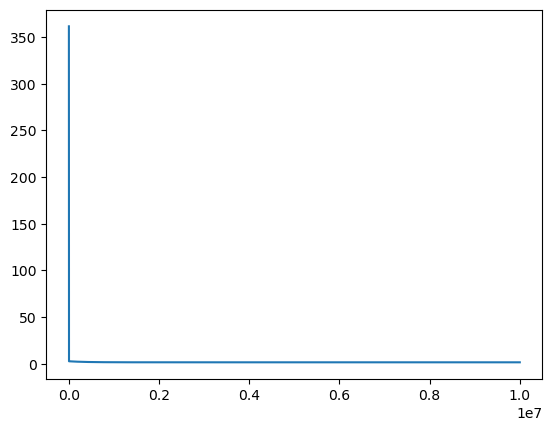

In [139]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [140]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [141]:
coef_determination(Y_test, predictions)

0.9059011965081696

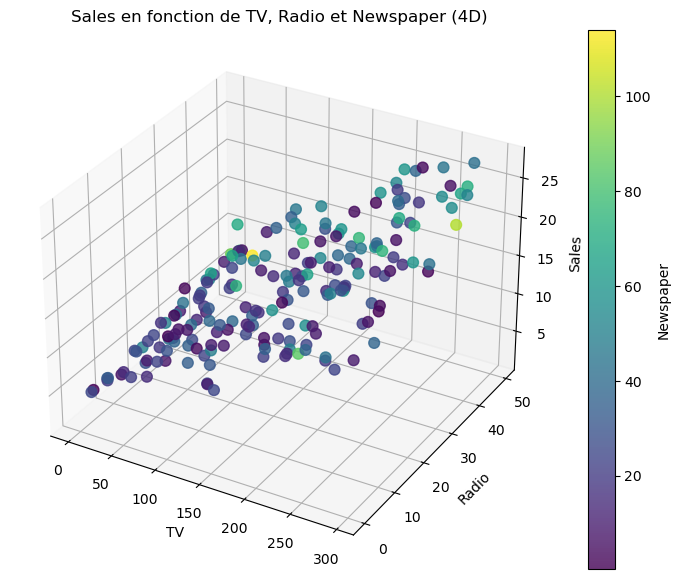

In [ ]:
# Figure 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter 4D : couleur = Newspaper
p = ax.scatter(
    df['TV'],          # Axe X
    df['Radio'],       # Axe Y
    df['Newspaper'],       # Axe Z
    c=df['Sales'], # Couleur = 4e dimension
    cmap='viridis',    # Colormap (peut changer : 'plasma', 'coolwarm', etc.)
    s=60,              # Taille des points
    alpha=0.8
)

# Ajouter la barre de couleur
cb = fig.colorbar(p, ax=ax)
cb.set_label('Sales')

# Titres et labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
plt.title('Sales en fonction de TV, Radio et Newspaper (4D)')

plt.show()
